In [1]:
# 1. Tensor Manipulations & Reshaping
# Tasks:

#     Create a random tensor of shape (4, 6).
#     Find its rank and shape using TensorFlow functions.
#     Reshape it into (2, 3, 4) and transpose it to (3, 2, 4).
#     Broadcast a smaller tensor (1, 4) to match the larger tensor and add them.
#     Explain how broadcasting works in TensorFlow.
import tensorflow as tf

# 1. Create a random tensor of shape (4, 6)
tensor = tf.random.normal((4, 6))

# 2. Find its rank and shape
print("Rank:", tf.rank(tensor).numpy())
print("Shape:", tensor.shape)

# 3. Reshape it to (2, 3, 4) and transpose to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("Reshaped tensor:", reshaped_tensor.shape)
print("Transposed tensor:", transposed_tensor.shape)

# 4. Broadcasting a smaller tensor (1, 4) to match the larger tensor and adding them
smaller_tensor = tf.random.normal((1, 4))
broadcasted_tensor = smaller_tensor + tf.zeros_like(tensor[:, :4])
print("Shape of broadcasted tensor:", broadcasted_tensor.shape)

# 5. Explanation: Broadcasting in TensorFlow allows tensors of different shapes to be used in operations.
# TensorFlow will automatically expand the dimensions of the smaller tensor to match the larger tensor for element-wise operations.

Rank: 2
Shape: (4, 6)
Reshaped tensor: (2, 3, 4)
Transposed tensor: (3, 2, 4)
Shape of broadcasted tensor: (4, 4)


MSE Loss: 0.025
CCE Loss: 0.40429434
Modified MSE Loss: 0.035
Modified CCE Loss: 0.4042943


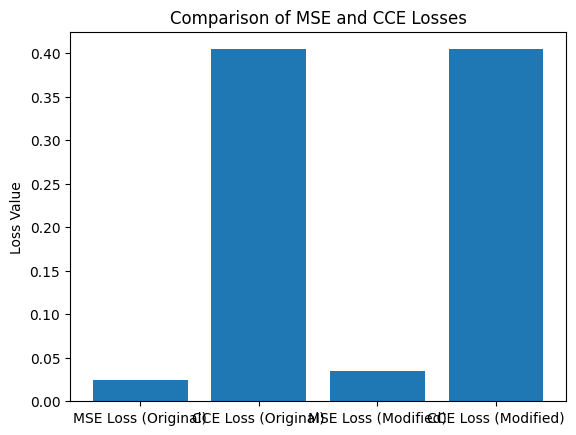

In [2]:
# 2. Loss Functions & Hyperparameter Tuning
# Tasks:

#     Define true values (y_true) and model predictions (y_pred).
#     Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses.
#     Modify predictions slightly and check how loss values change.
#     Plot loss function values using Matplotlib.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([[1, 0], [0, 1]], dtype=tf.float32)
y_pred = tf.constant([[0.8, 0.2], [0.1, 0.9]], dtype=tf.float32)

# 2. Compute MSE and CCE losses
mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
cce_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

print("MSE Loss:", mse_loss.numpy())
print("CCE Loss:", cce_loss.numpy())

# 3. Modify predictions slightly and check how loss changes
y_pred_modified = y_pred + 0.1  # Slight change in predictions
mse_loss_modified = tf.reduce_mean(tf.square(y_true - y_pred_modified))
cce_loss_modified = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred_modified))

print("Modified MSE Loss:", mse_loss_modified.numpy())
print("Modified CCE Loss:", cce_loss_modified.numpy())

# 4. Plot loss function values
losses = [mse_loss.numpy(), cce_loss.numpy(), mse_loss_modified.numpy(), cce_loss_modified.numpy()]
labels = ['MSE Loss (Original)', 'CCE Loss (Original)', 'MSE Loss (Modified)', 'CCE Loss (Modified)']
plt.bar(labels, losses)
plt.title("Comparison of MSE and CCE Losses")
plt.ylabel("Loss Value")
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8794 - loss: 0.4274 - val_accuracy: 0.9586 - val_loss: 0.1436
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9652 - loss: 0.1199 - val_accuracy: 0.9689 - val_loss: 0.0993
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9766 - loss: 0.0768 - val_accuracy: 0.9736 - val_loss: 0.0805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9755 - val_loss: 0.0783
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9781 - val_loss: 0.0740
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7191 - loss: 1.0597 - val_accuracy: 0.9041 - val_loss: 0.3612
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9039 - loss: 0.3513 - val_accuracy: 0.9208 - val_loss: 0.2880
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9198 - loss: 0.2902 - val_acc

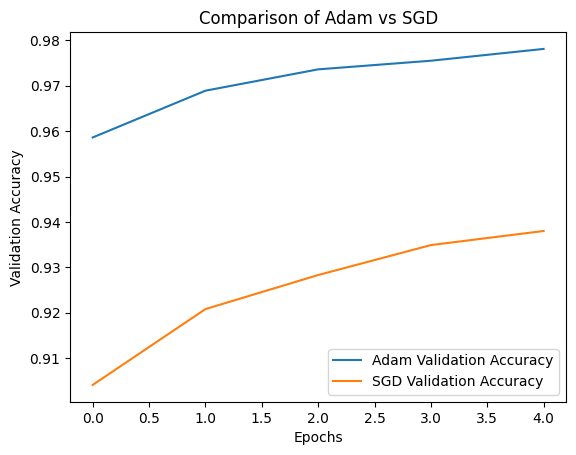

In [3]:
# 3. Train a Model with Different Optimizers
# Tasks:

#     Load the MNIST dataset.
#     Train two models: One with Adam and another with SGD.
#     Compare training and validation accuracy trends.
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

# 2. Build a simple neural network model
def build_model(optimizer):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with Adam
adam_model = build_model(optimizer='adam')
adam_history = adam_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Train with SGD
sgd_model = build_model(optimizer='sgd')
sgd_history = sgd_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 3. Plot accuracy trends
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(sgd_history.history['val_accuracy'], label='SGD Validation Accuracy')
plt.title('Comparison of Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [4]:
# 4. Train a Neural Network and Log to TensorBoard
# Tasks:

#     Load the MNIST dataset and preprocess it.
#     Train a simple neural network model and enable TensorBoard logging.
#     Launch TensorBoard and analyze loss and accuracy trends.

import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Load MNIST dataset and preprocess
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Build and compile a model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. TensorBoard logging
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs/fit')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# To launch TensorBoard:
# Run the following command in your terminal:
# tensorboard --logdir=logs/fit

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8776 - loss: 0.4308 - val_accuracy: 0.9593 - val_loss: 0.1374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9621 - loss: 0.1247 - val_accuracy: 0.9689 - val_loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9768 - loss: 0.0774 - val_accuracy: 0.9727 - val_loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9752 - val_loss: 0.0805
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9771 - val_loss: 0.0766
